In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import json, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
with open("../results/rate_constraints/adult-income/trials/results.json", 'r') as in_file:
    results = json.load(in_file)

with open("../results/rate_constraints/adult-income/trials/baseline.json", 'r') as in_file:
    baseline = json.load(in_file)
results['0'] = baseline['0']

In [8]:
print("Protected group counts: ", list(results.keys()))

Protected group counts:  ['1', '5', '10', '15', '22', '0']


In [9]:
def compute_score_mean(d):
    # compute mean of violations
    return np.mean(np.array(list(d.values()))*100)

def compute_score_median(d):
    # compute mean of violations
    return np.median(np.array(list(d.values()))*100)

def compute_score_max(d):
    # compute mean of violations
    return np.max(np.array(list(d.values()))*100)

def compute_score_std(d):
    # compute mean of violations
    return np.std(np.array(list(d.values()))*100)

In [24]:
def get_scores(results, key, func, filter_keys = False):
    # model constraint satisfaction
    all_scores = []
    constraint_set = ['0', '1', '5', '10', '15', '22']
    for num_constraints in constraint_set:
        trials = results[num_constraints]
        trial_scores = []
        for trial_num in trials.keys():
            trial_nums = trials[trial_num][key]
            if filter_keys:
                selected_keys = trials[trial_num]['active_constraints']
                trial_nums = {k: v for k, v in trial_nums.items() if k in selected_keys}
            score = func(trial_nums)
            trial_scores.append(score)
        all_scores.append(trial_scores)
        
    min_scores = []
    mean_scores = []
    max_scores = []
    baseline = 0
    for i in range(len(all_scores)):
        if i == 0:
            baseline = all_scores[0]
            continue
        min_scores.append(min(all_scores[i]))
        mean_scores.append(np.mean(all_scores[i]))
        max_scores.append(max(all_scores[i]))
    min_scores = np.array(min_scores)
    mean_scores = np.array(mean_scores)
    max_scores = np.array(max_scores)
    return min_scores, mean_scores, max_scores, baseline

In [92]:
def get_performance(results, key, func):
    # model performance (accuracy/tpr)
    all_scores = []
    constraint_set = ['0', '1', '5', '10', '15', '22']
    for num_constraints in constraint_set:
        trials = results[num_constraints]
        trial_scores = []
        for trial_num in trials.keys():
            score = trials[trial_num]['scores'][key]*100
            trial_scores.append(score)
        all_scores.append(trial_scores)
    min_scores = []
    mean_scores = []
    max_scores = []
    baseline = 0
    for i in range(len(all_scores)):
        if i == 0:
            baseline = all_scores[0]
            continue
        min_scores.append(min(all_scores[i]))
        mean_scores.append(np.mean(all_scores[i]))
        max_scores.append(max(all_scores[i]))
    min_scores = np.array(min_scores)
    mean_scores = np.array(mean_scores)
    max_scores = np.array(max_scores)
    return min_scores, mean_scores, max_scores, baseline

# Result 1: Overall constraint satisfaction score 

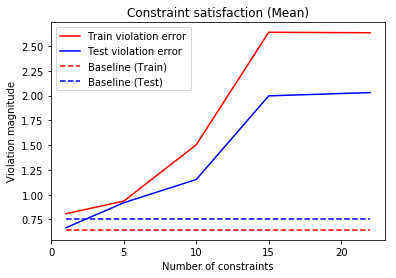

In [87]:
_, train_scores, _, train_baseline = get_scores(results, 'train_violation', compute_score_mean)
_, test_scores, _, test_baseline = get_scores(results, 'test_violation', compute_score_mean)
active_constraint_set = [1, 5, 10, 15, 22]
plt.hlines(y=train_baseline, xmin=1, xmax=22, label="Baseline (Train)", color="red", linestyle='dashed')
plt.plot(active_constraint_set, train_scores, label="Train violation error", color="red")

plt.hlines(y=test_baseline, xmin=1, xmax=22, label="Baseline (Test)", color="blue", linestyle='dashed')
plt.plot(active_constraint_set, test_scores, label="Test violation error", color="blue")

plt.title("Constraint satisfaction (Mean)")
plt.ylabel("Violation magnitude")
plt.xlabel("Number of constraints")
plt.legend()
plt.show()

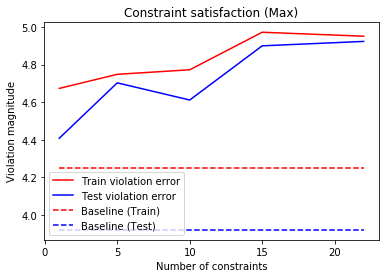

In [88]:
train_lower, train_scores, train_upper, train_baseline = get_scores(results, 'train_violation', compute_score_max)
test_lower, test_scores, test_upper, test_baseline = get_scores(results, 'test_violation', compute_score_max)
active_constraint_set = [1, 5, 10, 15, 22]
plt.hlines(y=train_baseline, xmin=1, xmax=22, label="Baseline (Train)", color="red", linestyle='dashed')
plt.plot(active_constraint_set, train_scores, label="Train violation error", color="red")
#plt.fill_between(active_constraint_set, train_upper, train_lower, alpha=0.25, color="red")

plt.hlines(y=test_baseline, xmin=1, xmax=22, label="Baseline (Test)", color="blue", linestyle='dashed')
plt.plot(active_constraint_set, test_scores, label="Test violation error", color="blue")
#plt.fill_between(active_constraint_set, test_upper, test_lower, alpha=0.25, color="blue")

plt.title("Constraint satisfaction (Max)")
plt.ylabel("Violation magnitude")
plt.xlabel("Number of constraints")
plt.legend()
plt.show()

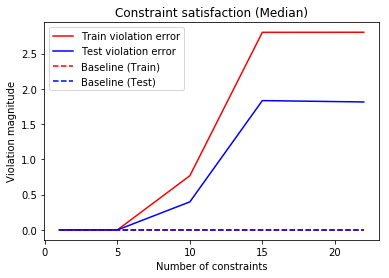

In [17]:
train_lower, train_scores, train_upper, train_baseline = get_scores(results, 'train_violation', compute_score_median, False)
test_lower, test_scores, test_upper, test_baseline = get_scores(results, 'test_violation', compute_score_median, False)
active_constraint_set = [1, 5, 10, 15, 22]
plt.hlines(y=train_baseline, xmin=1, xmax=22, label="Baseline (Train)", color="red", linestyle='dashed')
plt.plot(active_constraint_set, train_scores, label="Train violation error", color="red")

plt.hlines(y=test_baseline, xmin=1, xmax=22, label="Baseline (Test)", color="blue", linestyle='dashed')
plt.plot(active_constraint_set, test_scores, label="Test violation error", color="blue")

plt.title("Constraint satisfaction (Median)")
plt.ylabel("Violation magnitude")
plt.xlabel("Number of constraints")
plt.legend()
plt.show()

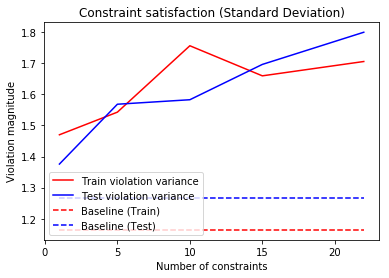

In [101]:
train_lower, train_scores, train_upper, train_baseline = get_scores(results, 'train_violation', compute_score_std)
test_lower, test_scores, test_upper, test_baseline = get_scores(results, 'test_violation', compute_score_std)
active_constraint_set = [1, 5, 10, 15, 22]
plt.hlines(y=train_baseline, xmin=1, xmax=22, label="Baseline (Train)", color="red", linestyle='dashed')
plt.plot(active_constraint_set, train_scores, label="Train violation variance", color="red")

plt.hlines(y=test_baseline, xmin=1, xmax=22, label="Baseline (Test)", color="blue", linestyle='dashed')
plt.plot(active_constraint_set, test_scores, label="Test violation variance", color="blue")

plt.title("Constraint satisfaction (Standard Deviation)")
plt.ylabel("Violation magnitude")
plt.xlabel("Number of constraints")
plt.legend()
plt.show()

## Accuracy 

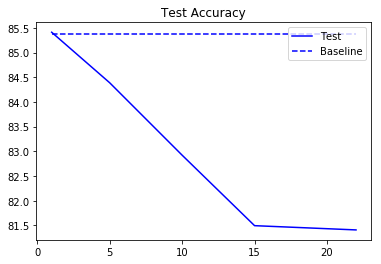

In [94]:
test_lower, test_scores, test_upper, test_baseline = get_performance(results, 'accuracy', None)
active_constraint_set = [1, 5, 10, 15, 22]

plt.hlines(y=test_baseline, xmin=1, xmax=22, label="Baseline", color="blue", linestyle='dashed')
plt.plot(active_constraint_set, test_scores, label="Test", color="blue")
#plt.fill_between(active_constraint_set, test_upper, test_lower, alpha=0.25, color="blue")

plt.title("Test Accuracy")
plt.legend()
plt.show()

## TPR

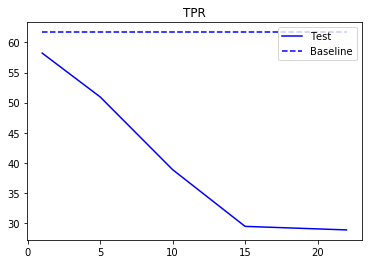

In [93]:
test_lower, test_scores, test_upper, test_baseline = get_performance(results, 'tpr', None)
active_constraint_set = [1, 5, 10, 15, 22]

plt.hlines(y=test_baseline, xmin=1, xmax=22, label="Baseline", color="blue", linestyle='dashed')
plt.plot(active_constraint_set, test_scores, label="Test", color="blue")
#plt.fill_between(active_constraint_set, test_upper, test_lower, alpha=0.25, color="blue")

plt.title("TPR")
plt.legend()
plt.show()

## Group-wise performance variance

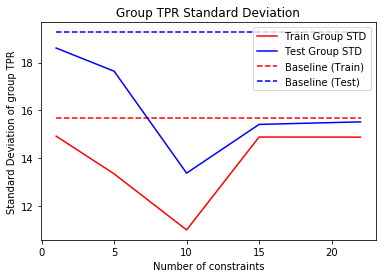

In [25]:
train_lower, train_scores, train_upper, train_baseline = get_scores(results, 'train_rates', compute_score_std)
test_lower, test_scores, test_upper, test_baseline = get_scores(results, 'test_rates', compute_score_std)
active_constraint_set = [1, 5, 10, 15, 22]
plt.hlines(y=train_baseline, xmin=1, xmax=22, label="Baseline (Train)", color="red", linestyle='dashed')
plt.plot(active_constraint_set, train_scores, label="Train Group STD", color="red")
#plt.fill_between(active_constraint_set, train_upper, train_lower, alpha=0.25, color="red")

plt.hlines(y=test_baseline, xmin=1, xmax=22, label="Baseline (Test)", color="blue", linestyle='dashed')
plt.plot(active_constraint_set, test_scores, label="Test Group STD", color="blue")
#plt.fill_between(active_constraint_set, test_upper, test_lower, alpha=0.25, color="blue")

plt.title("Group TPR Standard Deviation")
plt.ylabel("Standard Deviation of group TPR")
plt.xlabel("Number of constraints")
plt.legend()
plt.show()

In [77]:
np.std(list(results['1']['0']['test_rates'].values()))

0.19254309502469918

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


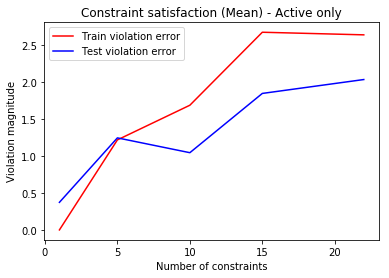

In [20]:
_, train_scores, _, train_baseline = get_scores(results, 'train_violation', compute_score_mean, True)
_, test_scores, _, test_baseline = get_scores(results, 'test_violation', compute_score_mean, True)
active_constraint_set = [1, 5, 10, 15, 22]
#plt.hlines(y=train_baseline, xmin=1, xmax=22, label="Baseline (Train)", color="red", linestyle='dashed')
plt.plot(active_constraint_set, train_scores, label="Train violation error", color="red")

#plt.hlines(y=test_baseline, xmin=1, xmax=22, label="Baseline (Test)", color="blue", linestyle='dashed')
plt.plot(active_constraint_set, test_scores, label="Test violation error", color="blue")

plt.title("Constraint satisfaction (Mean) - Active only")
plt.ylabel("Violation magnitude")
plt.xlabel("Number of constraints")
plt.legend()
plt.show()